In [1]:
%load_ext autoreload
%autoreload 2

# Calculate the b-factor on ECCO4v4

In [2]:
import numpy as np
import xarray as xr
from xgcm import Grid
import glob
import matplotlib.pyplot as plt

In [3]:
rootdir = '/data2/project/ECCO4v4/'
# neutral density
localdir = 'GAMMAN/*/'
filename = 'GAMMAN_*.nc'
gamma = xr.open_mfdataset(rootdir+localdir+filename)#.drop(['XC','YC','Z','timestep','time_bnds'])
# temperature
# localdir = 'nctiles_monthly/THETA/*/'
# filename = 'THETA_*.nc'
# theta = xr.open_mfdataset(rootdir+localdir+filename).drop(['XC','YC','Z','timestep','time_bnds'])
# salinity
# localdir = 'nctiles_monthly/SALT/*/'
# filename = 'SALT_*.nc'
# theta = xr.open_mfdataset(rootdir+localdir+filename).drop(['XC','YC','Z','timestep','time_bnds'])
gamma

<xarray.Dataset>
Dimensions:    (i: 90, j: 90, k: 50, nv: 2, tile: 13, time: 312)
Coordinates:
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    GAMMAN     (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes:
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    Project:                      Estimating the Circulation and Climate of t...
    cdm_data_type:                Grid
    geospatial_lon_units:         degrees_east
    Metadata_Conventions:         CF-1.6, Unidata Dataset Discovery v1.0, GDS...
    no_data:                      NaNf
    geospatial_lat_units:         degrees_north
    product_time_coverage_end:    2017-12-31T12:00:00
    geospatial_vertical_min:      -5906.25
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Sat Aug 17 21:07:19 2019
    geospatial_lat_max:           89.739395
    geospatial_lat_min:           -89.873055
    nx:                           90
    ny:                           90
    geospatial_lon_max:           179.98691
    geospatial_lon_min:           -179.98895
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

In [4]:
# shortwave
localdir = 'nctiles_monthly/oceQsw/*/'
filename = 'oceQsw_*.nc'
Q = xr.open_mfdataset(rootdir+localdir+filename)

In [5]:
rootdir = '/home/gmacgilchrist/data/ECCO/'
filename = 'ECCO-GRID.nc'
grid = xr.open_dataset(rootdir+filename)
grid

<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 ...
    YC       (tile, j, i) float32 ...
    XG       (tile, j_g, i_g) float32 ...
    YG       (tile, j_g, i_g) float32 ...
    CS       (tile, j, i) float32 ...
    SN       (tile, j, i) float32 ...
    Zl       (k_l) float32 ...
    Zu       (k_u) float32 ...
    Z        (k) float32 ...
    Zp1      (k_p1) float32 ...
    dxC      (tile, j, i_g) float32 ...
    rAs      (tile, j_g, i) float32 ...
    rAw      (tile, j, i_g) float32 ...
    Depth    (tile, j, i) float32 ...
    rA       (tile, j, i) float32 ...
    dxG      (tile, j_g, i) float32 ...
    dyG      (tile, j, i_g) float32 ...
    rAz      (tile, j_g, i_g) float32 ...
    dyC      (tile, j_g, i) float32 ...
    PHrefC   (k) float32 ...
    drC      (k_p1) float32 ...
    PHrefF   (k_p1) float32 ...
    drF      (k) float32 ...
    hFacS    (k, tile, j_g, i) float32 ...
    hFacC    (k, tile, j, i) float32 ...
    hFacW    (k, tile, j, i_g) float32 ...
    maskW    (k, tile, j, i_g) bool ...
    maskC    (k, tile, j, i) bool ...
    maskS    (k, tile, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [6]:
ds = xr.merge([Q,grid]).rename({'tile':'face'})

In [7]:
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, nv: 2, time: 312)
Coordinates:
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    XC         (face, j, i) float32 -111.60647 -111.303 ... -111.86579
    YC         (face, j, i) float32 -88.24259 -88.382515 ... -88.07871 -88.10267
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    XG         (face, j_g, i_g) float32 ...
    YG         (face, j_g, i_g) float32 ...
    CS         (face, j, i) float32 ...
    SN         (face, j, i) float32 ...
    Zl         (k_l) float32 0.0 -10.0 -20.0 -30.0 ... -4834.0 -5244.5 -5678.0
    Zu         (k_u) float32 -10.0 -20.0 -30.0 -40.0 ... -5244.5 -5678.0 -6134.5
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    Zp1        (k_p1) float32 0.0 -10.0 -20.0 -30.0 ... -5244.5 -5678.0 -6134.5
    dxC        (face, j, i_g) float32 ...
    rAs        (face, j_g, i) float32 ...
    rAw        (face, j, i_g) float32 ...
    Depth      (face, j, i) float32 ...
    rA         (face, j, i) float32 ...
    dxG        (face, j_g, i) float32 ...
    dyG        (face, j, i_g) float32 ...
    rAz        (face, j_g, i_g) float32 ...
    dyC        (face, j_g, i) float32 ...
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drC        (k_p1) float32 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.25
    PHrefF     (k_p1) float32 0.0 98.1 196.2 ... 51448.547 55701.18 60179.445
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    hFacS      (k, face, j_g, i) float32 ...
    hFacC      (k, face, j, i) float32 ...
    hFacW      (k, face, j, i_g) float32 ...
    maskW      (k, face, j, i_g) bool ...
    maskC      (k, face, j, i) bool ...
    maskS      (k, face, j_g, i) bool ...
Dimensions without coordinates: nv
Data variables:
    oceQsw     (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>

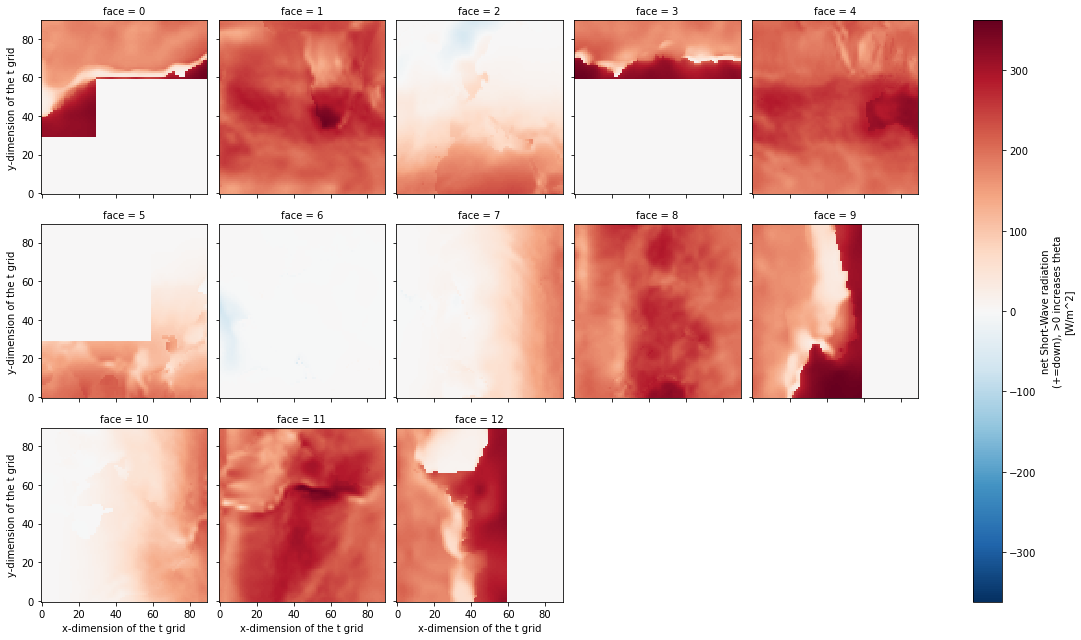

In [8]:
ds['oceQsw'].isel(time=0).plot(col='face', col_wrap=5)

In [9]:
# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

ds['drW'] = ds.hFacW * ds.drF #vertical cell size at u point
ds['drS'] = ds.hFacS * ds.drF #vertical cell size at v point
ds['drC'] = ds.hFacC * ds.drF #vertical cell size at tracer point

metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drW', 'drS', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}

# create the grid object
xgrid = Grid(ds, periodic=False, face_connections=face_connections, metrics=metrics)
xgrid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

In [14]:
# Calculate gradients in T, S, and gamma
# (first interpolate to edge points so that 
# resultant gradient is in the center)
# Horizontal
# Txq = xgrid.interp(ds['thetao'],'X')
# dTdx = xgrid.derivative(Txq, 'X')
# Tyq = xgrid.interp(ds['thetao'],'Y',boundary='fill')
# dTdy = xgrid.derivative(Tyq, 'Y',boundary='fill')
# Sxq = xgrid.interp(ds['so'],'X')
# dSdx = xgrid.derivative(Sxq, 'X')
# Syq = xgrid.interp(ds['so'],'Y',boundary='fill')
# dSdy = xgrid.derivative(Syq, 'Y',boundary='fill')
gxq = xgrid.interp(ds['oceQsw'],'X')
dgdx = xgrid.diff(gxq, 'X')
# gxq = xgrid.interp(dgdx,'X')
# gyq = xgrid.interp(ds['GAMMAN'],'Y',boundary='fill')
# dgdy = xgrid.derivative(gyq, 'Y',boundary='fill')
# Vertical
# T_zi = xgrid.interp(ds['thetao'],'Z',boundary='extrapolate')
# dTdz = xgrid.derivative(T_zi, 'Z')
# S_zi = xgrid.interp(ds['so'],'Z',boundary='extrapolate')
# dSdz = xgrid.derivative(S_zi, 'Z')
# g_zi = xgrid.interp(ds['GAMMAN'],'Z',boundary='extrapolate')
# dgdz = xgrid.derivative(g_zi, 'Z')

ValueError: 'j_g' not found in array dimensions ('time', 'face', 'j', 'i_g')

In [12]:
dgdx.interp()

,Array,Chunk
Bytes,131.41 MB,32.04 kB
Shape,"(312, 13, 90, 90)","(1, 1, 90, 89)"
Count,59280 Tasks,8112 Chunks
Type,float32,numpy.ndarray


In [37]:
# Load some T and S data, and grid data
rootdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/OM4p25_JRA55do1.4_0netfw_cycle6/gfdl.ncrc4-intel16-prod/pp/'
pp = 'ocean_annual_z'
localdir = '/ts/annual/5yr/'
filename = pp+'.2013-2017.*.nc'
ds = xr.open_mfdataset(rootdir+pp+localdir+filename).isel(time=0)
grid = xr.open_dataset(rootdir+pp+'/'+pp+'.static.nc')

In [38]:
# Load gamma_n
gammadir = '/archive/gam/so_decadal_variability/OM4p25_JRA55do1.4_0netfw_cycle6/'
gamma = xr.open_dataset(gammadir+pp+'/gamma_n.nc').isel(time=0)
gamma = gamma['gamma_n'].assign_attrs({'long_name':'Neutral density (gamma_n) from Jackett and McDougall (1997)',
                    'units':'kgm-3',
                    'standard_name':'gamma_n'});
gamma = gamma.where(gamma>0,np.nan)

In [39]:
# Calculate some derived variables
# ds['g'] = wmt.sigmantr_mjd05(ds['so'],ds['thetao'])
ds['g'] = gamma
ds['p'] = wmt.gsw_p_from_z(-ds['z_l'],grid['geolat'])
ds['alpha'] = wmt.gsw_alpha(ds['so'],ds['thetao'],ds['p'])
ds['beta'] = wmt.gsw_beta(ds['so'],ds['thetao'],ds['p'])
ds['rhoinsitu'] = wmt.gsw_rho(ds['so'],ds['thetao'],ds['p'])
# Vertical grid spacing
ds['dzt'] = xr.DataArray(data=ds['z_i'].diff('z_i').values,
                         coords={'z_l': ds['z_l']},
                         dims=('z_l'))
ds = xr.merge([ds,grid])

In [40]:
# Build xgcm grid object
# (see https://mom6-analysiscookbook.readthedocs.io/en/latest/01c_getting_started.html#building-a-xgcm-grid-object)

# Fill in nans with zeros
ds['dxt'] = ds['dxt'].fillna(0.)
ds['dyt'] = ds['dyt'].fillna(0.)
ds['dzt'] = ds['dzt'].fillna(0.)
ds['areacello'] = ds['areacello'].fillna(0.)
ds['volcello'] = ds['volcello'].fillna(0.)

metrics = {
    ('X',): ['dxt','dxCu','dxCv'], # X distances
    ('Y',): ['dyt','dyCu','dyCv'], # Y distances
    ('Z',): ['dzt'], # Z distances
    ('X', 'Y'): ['areacello'], # Areas
    ('X', 'Y', 'Z'): ['volcello'], # Volumes
}

coords={'X': {'center': 'xh', 'right': 'xq'},
        'Y': {'center': 'yh', 'right': 'yq'},
        'Z': {'center': 'z_l', 'outer': 'z_i'} }

xgrid = Grid(ds, coords=coords, metrics=metrics, periodic=['X'])

In [41]:
# Calculate gradients in T, S, and gamma
# (first interpolate to edge points so that 
# resultant gradient is in the center)
# Horizontal
Txq = xgrid.interp(ds['thetao'],'X')
dTdx = xgrid.derivative(Txq, 'X')
Tyq = xgrid.interp(ds['thetao'],'Y',boundary='fill')
dTdy = xgrid.derivative(Tyq, 'Y',boundary='fill')
Sxq = xgrid.interp(ds['so'],'X')
dSdx = xgrid.derivative(Sxq, 'X')
Syq = xgrid.interp(ds['so'],'Y',boundary='fill')
dSdy = xgrid.derivative(Syq, 'Y',boundary='fill')
gxq = xgrid.interp(ds['g'],'X')
dgdx = xgrid.derivative(gxq, 'X')
gyq = xgrid.interp(ds['g'],'Y',boundary='fill')
dgdy = xgrid.derivative(gyq, 'Y',boundary='fill')
# Vertical
T_zi = xgrid.interp(ds['thetao'],'Z',boundary='extrapolate')
dTdz = xgrid.derivative(T_zi, 'Z')
S_zi = xgrid.interp(ds['so'],'Z',boundary='extrapolate')
dSdz = xgrid.derivative(S_zi, 'Z')
g_zi = xgrid.interp(ds['g'],'Z',boundary='extrapolate')
dgdz = xgrid.derivative(g_zi, 'Z')

In [42]:
# Calculate derivative of locally referenced potential density
rho = ds['rhoinsitu']
alpha = ds['alpha']
beta = ds['beta']

drdx = rho*(-alpha*dTdx + beta*dSdx)
drdy = rho*(-alpha*dTdy + beta*dSdy)
drdz = rho*(-alpha*dTdz + beta*dSdz)

In [43]:
# Calculate absolute magnitude of gradients
absgradr = xr.ufuncs.sqrt(xr.ufuncs.square(drdx)+
                          xr.ufuncs.square(drdy)+
                          xr.ufuncs.square(drdz))
absgradg = xr.ufuncs.sqrt(xr.ufuncs.square(dgdx)+
                          xr.ufuncs.square(dgdy)+
                          xr.ufuncs.square(dgdz))

In [44]:
# Calculate b as ratio
b = absgradg/absgradr

In [45]:
b.load();

<ipython-input-55-08d7ea99cc74>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),


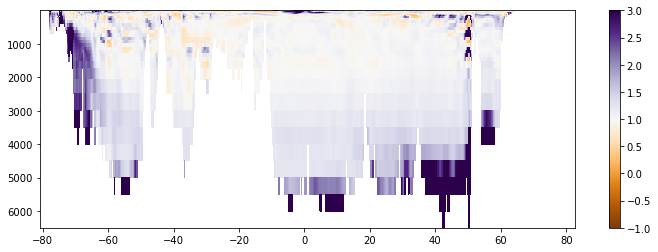

In [55]:
select = {'xh':-180}
fig,ax = plt.subplots(figsize=(12,4))
im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),
                   ds['z_l'],
                   b.sel(select,method='nearest').transpose(),
                   vmin=-1,vmax=3,cmap='PuOr')
plt.colorbar(im,ax=ax)
ax.invert_yaxis()

<ipython-input-51-927c4415ce7f>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),


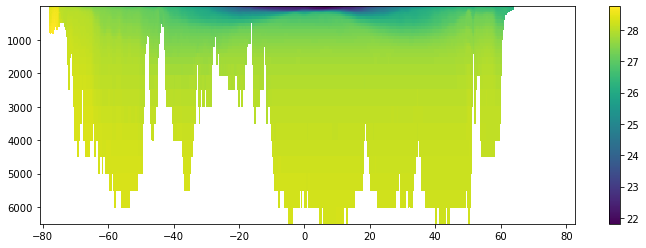

In [51]:
select = {'xh':-180}
fig,ax = plt.subplots(figsize=(12,4))
im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),
           ds['z_l'],
           ds['g'].sel(select,method='nearest').transpose())
ax.invert_yaxis()
plt.colorbar(im,ax=ax)